NOTE: This part of analysis is being done by Aman, it is still a work in progress. Muwei is doing other parts of analysis. Feel free to give us your inputs any changes, suggestions etc.

In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

In [2]:
eng_jobs = pd.read_csv('./sampledata/EngineeringJobs.csv')
finance_jobs = pd.read_csv('./sampledata/FinanceJobs.csv')
it_jobs = pd.read_csv('./sampledata/ITJobs.csv')
market_jobs = pd.read_csv('./sampledata/MarketingJobs.csv')
marketm_jobs = pd.read_csv('./sampledata/MarketingmanagerJobs.csv')
sales_jobs = pd.read_csv('./sampledata/SalesJobs.csv')
jobs_category = [eng_jobs, finance_jobs, it_jobs, market_jobs, marketm_jobs, sales_jobs]

In [3]:
eng_jobs.head()

,Company,Rating,Title,Location,Salary
0,Modern Hire,4.6,Senior Software Engineer (Machine Learning/AI),"Delafield, WI",NaN
1,Analytical Technologies Group,5.0,Field Service Engineer,"Groton, CT",$50k-$85k
2,Northwestern Surveying and Engineering,5.0,Survey Crew Member,"Bemidji, MN",NaN
3,Renewable Water Resources,4.0,Asset Management Manager,"Greenville, SC",NaN
4,Stainless Process Systems,NaN,Plating Production Manager,"Oxnard, CA",NaN


In [4]:
finance_jobs.head()

,Company,Rating,Title,Location,Salary
0,Five Rings Financial,4.6,Women in Finance,"Denver, CO",NaN
1,Chapman and Cutler LLP,3.6,Accounting and Finance Intern,"Chicago, IL",NaN
2,Sulzer,3.7,Cost Accountant,"Portland, OR",NaN
3,Waldorf Auto Group,NaN,Finance Manager,"Waldorf, MD",NaN
4,"OYSTER COVE BOAT WORKS & YACHT BROKERAGE, INC",NaN,Finance Manager,"Gloucester, VA",NaN


In [5]:
it_jobs.head()

,Company,Rating,Title,Location,Salary
0,Path Forward IT,3.7,IT Support Technician,"San Rafael, CA",$42k-$61k
1,Able Moving and Storage,4.8,Senior Level IT Support,"Manassas, VA",NaN
2,Fleetcor,2.8,"Director, IT Operations Services Delivery","Norcross, GA",$96k-$144k
3,Burton McCumber & Longoria,2.0,IT Consultant,"Brownsville, TX",NaN
4,Fleetcor,2.8,IT Project Manager,"Peachtree Corners, GA",NaN


In [6]:
market_jobs.head()

,Company,Rating,Title,Location,Salary
0,SourceOne Events,4.1,Marketing Manager,"Lombard, IL",$40k-$50k
1,Central Insurance Companies,4.5,Marketing Manager - Virginia,"Fredericksburg, VA",$68k-$102k
2,Wholesale,NaN,Showroom Assistant,"Grand Rapids, MI",NaN
3,"Mystic Therapy, LLC",NaN,"Mental Health Clinicians (LMFT, LCSW, LPC, LAD...","Mystic, CT",$42k-$65k
4,Corporate Caterers,4.2,Catering Personnel,"San Leandro, CA",$15-$17


In [7]:
marketm_jobs.head()

,Company,Rating,Title,Location,Salary
0,SourceOne Events,4.1,Marketing Manager,"Lombard, IL",$40k-$50k
1,FTL Finance,5.0,Marketing Manager,"Saint Charles, MO",NaN
2,Vanguard Integrity Professionals,2.9,Software Marketing Manager,"Las Vegas, NV",NaN
3,Chipotle,3.4,Service Manager,"Shawnee, KS",$14-$16
4,New Masters Academy,NaN,PPC/SEO Marketing Manager,"Huntington Beach, CA",$50k-$60k


In [8]:
sales_jobs.head()

,Company,Rating,Title,Location,Salary
0,Vector Marketing,4.5,Customer Sales/Service -Immediate Positions - ...,"Roanoke, VA",$12-$16
1,Family First Life,4.9,Outside Sales,"Charlotte, NC",NaN
2,Your Floor Pros,NaN,Assistant Store Manager Sales,"Grand Island, NE",NaN
3,WMB Windows,NaN,Customer Service -Inside Sales,"Ontario, CA",$14-$17
4,Greenwich Independent Insurance,NaN,Insurance Agent Apprentice Assistant,"Greenwich, CT",NaN


In [9]:
# merge tables
merged_jobs = pd.concat(jobs_category, ignore_index=True, sort=False)
# drop duplicates
merged_jobs = merged_jobs.drop_duplicates()
merged_jobs = merged_jobs.reset_index(drop=True)

In [10]:
merged_jobs.head()

,Company,Rating,Title,Location,Salary
0,Modern Hire,4.6,Senior Software Engineer (Machine Learning/AI),"Delafield, WI",NaN
1,Analytical Technologies Group,5.0,Field Service Engineer,"Groton, CT",$50k-$85k
2,Northwestern Surveying and Engineering,5.0,Survey Crew Member,"Bemidji, MN",NaN
3,Renewable Water Resources,4.0,Asset Management Manager,"Greenville, SC",NaN
4,Stainless Process Systems,NaN,Plating Production Manager,"Oxnard, CA",NaN


In [11]:
print("Total number of jobs scraped: {}".format(len(merged_jobs)))

Total number of jobs scraped: 3555


## Q.2(a) Which city in US offers the most job opportunities?

In [28]:
def compute_most_job_by_city(jobs, top=10):
    jobs = jobs[jobs['Location'] != "Remote"]
    jobs['Location'] = jobs['Location'].apply(lambda x: x.split(", ")[0].lower())
    gb = jobs.groupby('Location')
    city_num = dict(gb.size())
    num_city = sorted([(v, k) for k,v in city_num.items()], key=lambda x: x[0], reverse=True)[:top]
    count = [x[0] for x in num_city]
    cities = [x[1].title().replace(" ", "\n") for x in num_city]
    
    return count, cities  

In [29]:
city_count, cities = compute_most_job_by_city(merged_jobs.copy())

/Users/amanraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


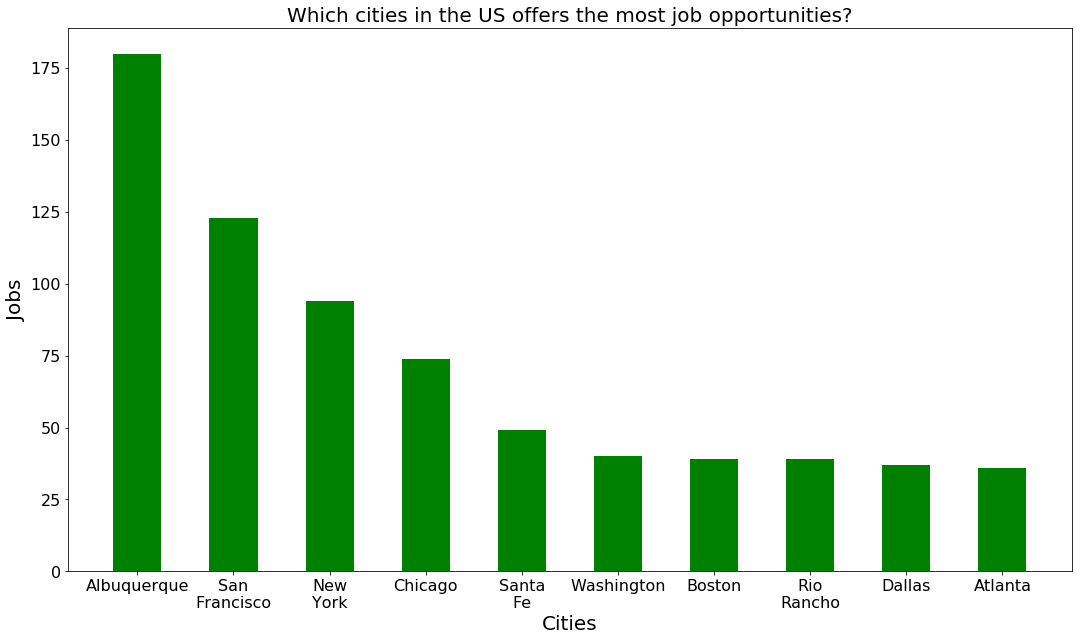

In [20]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
ax.bar(cities, city_count, facecolor="green", width=0.5)
ax.set_xlabel('Cities', fontsize=20)
ax.set_ylabel('Jobs', fontsize=20)
ax.set_title('Which cities in the US offers the most job opportunities?', fontsize=20)
ax.tick_params(labelsize=16)
#fig.savefig('image.png', format='png', dpi=300)s

## Q.2(b) Which state in US offers the most job opportunities?

In [46]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [53]:
def compute_most_job_by_state(jobs, top=10):
    jobs = jobs[jobs['Location'] != "Remote"]
    jobs['Location'] = jobs['Location'].apply(lambda x: x.split(" ")[-1])
    
    gb = jobs.groupby('Location')
    state_num = dict(gb.size())
    num_state = sorted([(v, k) for k,v in state_num.items()], key=lambda x: x[0], reverse=True)[:top]
    count = [x for x,_ in num_state]
    states = []
    states = [x if len(abbrev_us_state[x])>10 else abbrev_us_state[x].replace(" ", "\n") for _,x in num_state]
    
    return count, states

In [54]:
count, states = compute_most_job_by_state(merged_jobs.copy())

/Users/amanraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


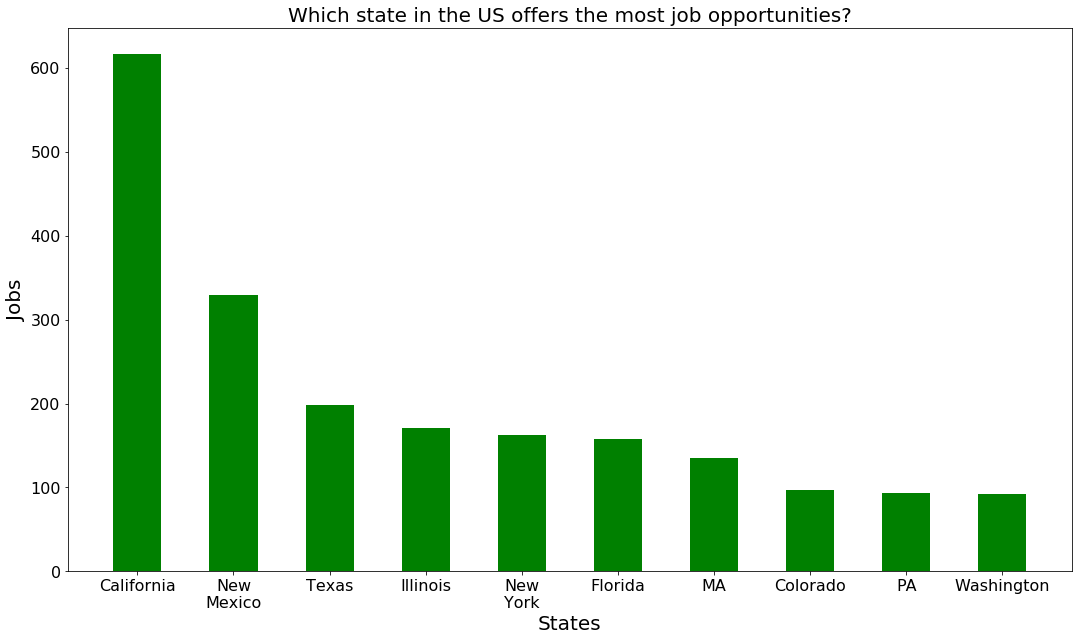

In [55]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
ax.bar(states, count, facecolor="green", width=0.5)
ax.set_xlabel('States', fontsize=20)
ax.set_ylabel('Jobs', fontsize=20)
ax.set_title('Which state in the US offers the most job opportunities?', fontsize=20)
ax.tick_params(labelsize=16)
#fig.savefig('image.png', format='png', dpi=300)s

## Q.5 Which company offers a versatile portfolio of jobs?